# Indel/gap metric example

To get started with sequences, we begin by importing some useful python packages:

In [12]:
# useful imports
import sys, re # re is regular expression lib
import numpy as np
import pandas as pd
from Bio import AlignIO, SeqIO, Seq 
import matplotlib.pyplot as plt
import seaborn as sns

Read input MSA conatins gaps representing indel events:

In [9]:
align = AlignIO.read('./samples/arpip/msa.fasta', 'fasta')

Extract gap length for each strach of gap per each record and store them in a dictionary: 

In [10]:
# making an empty dictionary of species to store the information
dict_gap_len_species = {}
for rec in align:
    dict_gap_len_species[rec.id] = []
# print(dict_gap_len_species)

# gap length per each specie
for record in align:
    tmp_rc_id = ''
    matches = list(re.finditer('-+', str(record.seq)))
    # when a stretch of gap exists
    if len(matches) != 0:
        if tmp_rc_id != record.id:
            tmp_rc_id = record.id
        for region_number, match in enumerate(matches, 1):
            # store the gap length
            gap_length = match.end() - match.start()
            dict_gap_len_species[record.id].append(gap_length)

Plot the gap length distribution

The list of gap elements: [4, 4, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1]


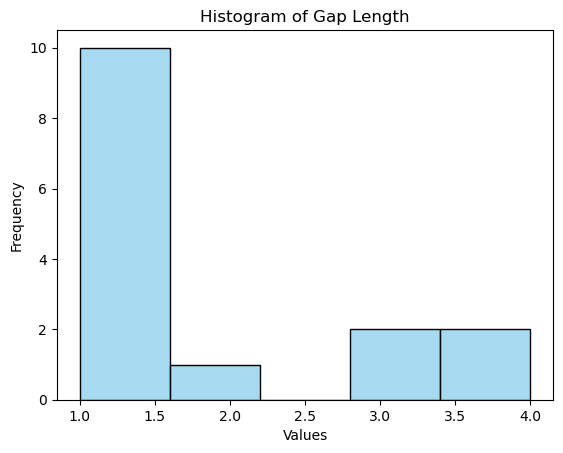

In [15]:
lst_gap_lengths = sum(dict_gap_len_species.values(), [])
print("The list of gap elements:", (lst_gap_lengths))

# Plot histogram
sns.histplot(lst_gap_lengths, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Gap Length')

# Show the plot
plt.show()

Extracting indel events

### Computing indel bias